In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

from IPython.display import display, Math, Latex


import log_reg

# 1) Create Dataset

The dataset is meant to represent whether a day is considered good or not, given temperature, wind, and humitidy.

In [31]:
data = pd.read_csv("A1_Data_EliWeissler.csv")
data

,temp,wind,humidity,LABEL
0,80,2,10,1
1,100,5,80,0
2,90,10,100,0
3,70,1,25,1
4,75,6,40,1
5,85,15,70,0
6,80,10,85,0


Normalizing the data to be between 0-1, we get (rounding to two decimal places):

In [49]:
X, Y = log_reg.normalize_data(data)
display(Math("X = " + sy.latex(sy.Matrix(np.round(X, 2))) +\
             "\quad Y = " + sy.latex(sy.Matrix(np.round(Y, 2)))))

<IPython.core.display.Math object>

# 2) Linear Equations

For this problem, consider a linear equation with $n$ variables. This gives us $w \in \R^n$, $x \in \R^n$, $b \in \R^1$, and $z \in \R^1$.

### a) 

In general, we will have:

$$
z = \sum_{i=1}^n w_i x_i + b
$$

### b) 

In vector form, the sum is equivalent to a dot product between $c$ and $x$:

$$
z = w^Tx + b
$$

### c) 

The $w$ values represent weights for each varible. This can be thought of as the slope of the hyperplane in $R^n$ with respect to said variable (i.e., $\partial_{x_i}z = w_i$)

### d)

The b value represents a bias, or offset. This is the value of z when all variables are 0 (i.e., y intercept in the 1-d case of $ y = mx + b$).

# 3) Plot Data

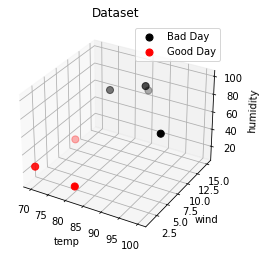

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plotting
colors = ["k", "r"]
for is_good in [0,1]:
    data_subset = data[data["good_day"] == is_good]
    ax.scatter(data_subset["temp"], data_subset["wind"], data_subset["humidity"],
               s=50, c=colors[is_good], label="Good Day" if is_good else "Bad Day")
ax.set_title('Dataset')
ax.set_xlabel("temp")
ax.set_ylabel("wind")
ax.set_zlabel("humidity")
ax.legend()
plt.show()

# 4) Data Clustered? 

The data is easily linearly separable with respect to the labeling

# 5) Sigmoid

### a)

The sigmoid function is

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

or

$$
\sigma(x) = \frac{e^{x}}{e^{x} + 1}
$$ 

### b)
To show that the two forms are equal, multiply the first form by $e^{x}/{e^x}$:

$$
\sigma(x) = \frac{1}{1 + e^{-x}} = \frac{1}{1 + e^{-x}}\cdot\frac{e^x}{e^x} = \frac{e^{x}}{e^{x} + 1}
$$

### c)

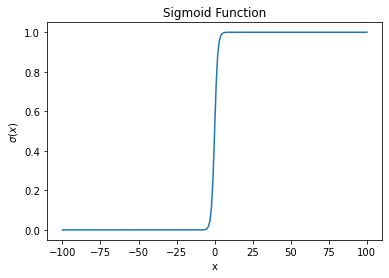

In [30]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
x = np.arange(-100, 101)
plt.plot(x, sigmoid(x))
plt.xlabel("x")
plt.ylabel(r"$\sigma(x)$")
plt.title("Sigmoid Function");

### d)

Using the quotient rule

$$
\frac{d}{dx}\frac{f(x)}{g(x)} = \frac{f'(x)g(x) - f(x)g'(x)}{g(x)^2}
$$

we can see that:
$$
\begin{align*}
\frac{d}{dx}\sigma(x) &= \frac{d}{dx}[\frac{1}{1 + e^{-x}}] = \frac{0\cdot(1+e^{-x}) - 1\cdot(-e^{-x})}{(1+e^{-x})^2} \\
&= \frac{e^{-x}}{(1+e^{-x})^2} \\
&= \frac{1}{1+e^{-x}}\cdot\frac{e^{-x}}{1+e^{-x}} \\
&= \frac{1}{1+e^{-x}}(\frac{1 + e^{-x}}{1 + e^{-x}} - \frac{1}{1+e^{-x}}) \\
&= \boxed{\sigma(x)(1-\sigma(x))}
\end{align*}
$$

6) 